<a href="https://colab.research.google.com/github/DoSiHoai/DoSiHoai_20146491_AI_2023/blob/main/Cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

Hinh anh [73]


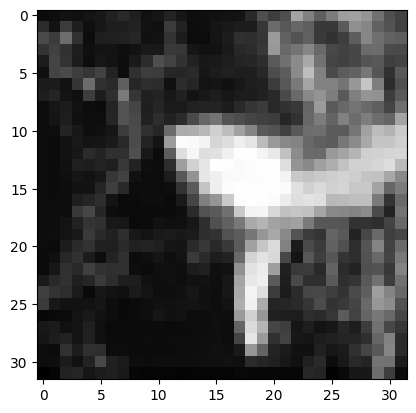

In [4]:
image = x_train[3000]
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show
print('Hinh anh', y_train[3000])

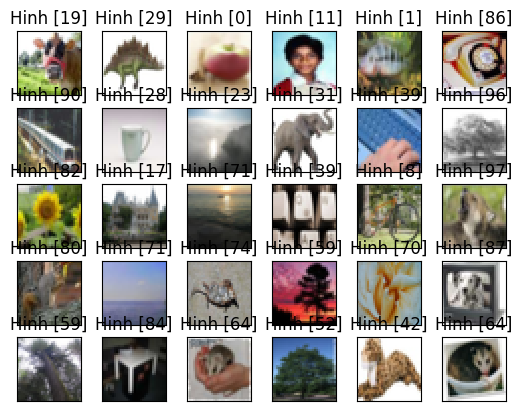

In [5]:
for i in range(30):
  plt.subplot(5, 6, i+1)
  plt.tight_layout
  plt.imshow(x_train[i], cmap = 'gray', interpolation = 'None')
  plt.title('Hinh {}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [6]:
from keras.models import Sequential      #su tuan tu cac lop _ mang ANN
from keras.layers import Dense      #ket noi day du/ full connected

model = Sequential()
model.add(Dense(4096, activation= 'relu',input_shape= (32*32*3,) )) #Gia tri toi uu
model.add(Dense(2048, activation= 'relu'))
model.add(Dense(512, activation= 'relu'))
model.add(Dense(100, activation= 'softmax'))
model.summary()
     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4096)              12587008  
                                                                 
 dense_1 (Dense)             (None, 2048)              8390656   
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 100)               51300     
                                                                 
Total params: 22,078,052
Trainable params: 22,078,052
Non-trainable params: 0
_________________________________________________________________


In [7]:
x_train = x_train.reshape((50000, 32*32*3))
x_train = x_train.astype('float32')/255
x_train.shape
x_test = x_test.reshape((10000, 32*32*3))
x_test = x_test.astype('float32')/255

x_test.shape

(10000, 3072)

In [8]:
from keras.utils import to_categorical # chuyen 1 bit thanh nhieu bit
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [9]:
model.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.fit(x_train, y_train, epochs= 30, batch_size= 1000)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Do mat mat:', test_loss)
print('Do chinh xac:', test_acc)

Epoch 1/30
50/50 [==============================] - 138s 3s/step - loss: 5.1406 - accuracy: 0.0193
Epoch 2/30
50/50 [==============================] - 134s 3s/step - loss: 4.2898 - accuracy: 0.0454
Epoch 3/30
50/50 [==============================] - 134s 3s/step - loss: 4.1476 - accuracy: 0.0601
Epoch 4/30
50/50 [==============================] - 140s 3s/step - loss: 4.0300 - accuracy: 0.0787
Epoch 5/30
50/50 [==============================] - 132s 3s/step - loss: 3.9505 - accuracy: 0.0932
Epoch 6/30
50/50 [==============================] - 132s 3s/step - loss: 3.8718 - accuracy: 0.1061
Epoch 7/30
50/50 [==============================] - 133s 3s/step - loss: 3.8020 - accuracy: 0.1192
Epoch 8/30
50/50 [==============================] - 133s 3s/step - loss: 3.7392 - accuracy: 0.1264
Epoch 9/30
50/50 [==============================] - 132s 3s/step - loss: 3.6787 - accuracy: 0.1345
Epoch 10/30
50/50 [==============================] - 133s 3s/step - loss: 3.6322 - accuracy: 0.1448
Epoch 11/

In [10]:
from keras.saving.saving_api import load_model
model.save('cifar100.h5')
model100 = load_model('cifar100.h5')

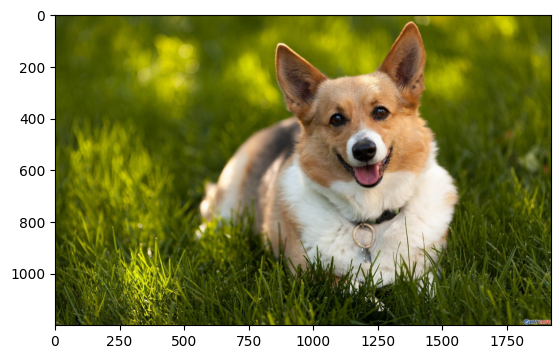

In [14]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
import numpy as np
from PIL import Image

img = Image.open('anhcho.jpg')
imshow(img)

In [15]:
img = load_img('anhcho.jpg', target_size= (32,32))
img = img_to_array(img)
img = img.reshape((1,32*32*3))
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis= 1)

1/1 [==============================] - 0s 52ms/step


array([62])